# **Tesla Stock Price Indicator**

In [90]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.read_csv('tsla_2014_2023.csv')
df.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
0,2014-01-02,9.986667,10.165333,9.770000,10.006667,92826000,55.344071,54.440118,-37.373644,15.213422,9.682107,9.820167,10.494240,9.674284,0.169472,9.740800,0.395333,0.402641,0.447550,9.970667
1,2014-01-03,10.000000,10.146000,9.906667,9.970667,70425000,53.742629,53.821521,-81.304471,17.481130,9.652800,9.826069,10.495693,9.680190,0.162623,9.776167,0.239333,0.379311,0.432677,9.800000
2,2014-01-06,10.000000,10.026667,9.682667,9.800000,80416500,46.328174,50.870410,-123.427544,-37.824708,9.629467,9.825047,10.496740,9.682577,0.141790,9.797900,0.344000,0.374267,0.426343,9.957333
3,2014-01-07,9.841333,10.026667,9.683333,9.957333,75511500,53.263037,53.406750,-84.784651,-20.779431,9.597747,9.830235,10.503407,9.688051,0.136402,9.837900,0.343334,0.369848,0.420414,10.085333
4,2014-01-08,9.923333,10.246667,9.917333,10.085333,92448000,58.368660,55.423026,60.799662,43.570559,9.573240,9.840239,10.511147,9.695964,0.140837,9.870167,0.329334,0.364060,0.413908,9.835333


In [92]:
df.shape

(2516, 20)

In [93]:
df.isnull().sum()

date              0
open              0
high              0
low               0
close             0
volume            0
rsi_7             0
rsi_14            0
cci_7             0
cci_14            0
sma_50            0
ema_50            0
sma_100           0
ema_100           0
macd              0
bollinger         0
TrueRange         0
atr_7             0
atr_14            0
next_day_close    0
dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            2516 non-null   object 
 1   open            2516 non-null   float64
 2   high            2516 non-null   float64
 3   low             2516 non-null   float64
 4   close           2516 non-null   float64
 5   volume          2516 non-null   int64  
 6   rsi_7           2516 non-null   float64
 7   rsi_14          2516 non-null   float64
 8   cci_7           2516 non-null   float64
 9   cci_14          2516 non-null   float64
 10  sma_50          2516 non-null   float64
 11  ema_50          2516 non-null   float64
 12  sma_100         2516 non-null   float64
 13  ema_100         2516 non-null   float64
 14  macd            2516 non-null   float64
 15  bollinger       2516 non-null   float64
 16  TrueRange       2516 non-null   float64
 17  atr_7           2516 non-null   f

In [95]:
df['date'] = pd.to_datetime(df['date'])

### How has the stock price fluctuated over time, and what trends can be identified in the opening, closing, high, and low prices?

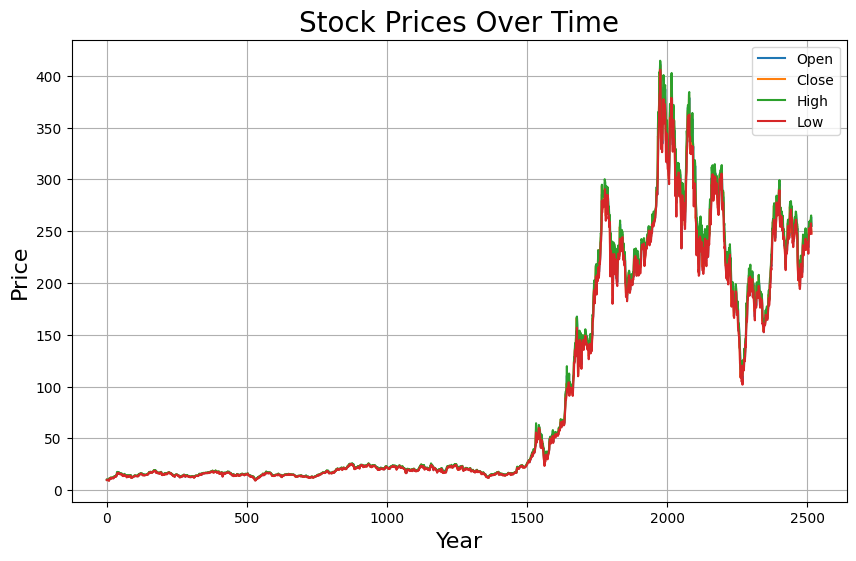

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['open'], label='Open')
plt.plot(df.index, df['close'], label='Close')
plt.plot(df.index, df['high'], label='High')
plt.plot(df.index, df['low'], label='Low')
plt.title('Stock Prices Over Time', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

### Is there any correlation between trading volume and price movements? Are there any notable spikes in volume that coincide with significant price changes?

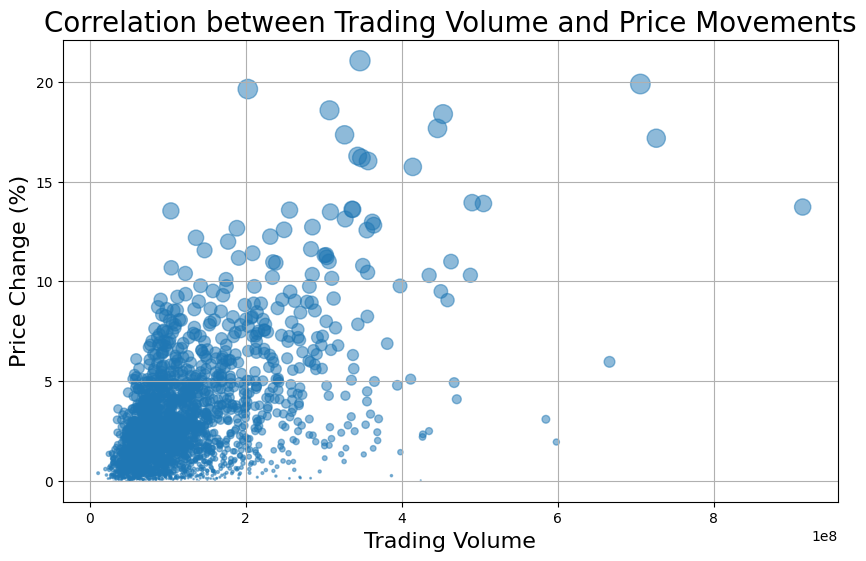

In [97]:
df['Price_Change'] = df['close'].pct_change().abs() * 100

plt.figure(figsize=(10, 6))
plt.scatter(df['volume'], df['Price_Change'], s=df['Price_Change']*10, alpha=0.5)
plt.title('Correlation between Trading Volume and Price Movements', fontsize=20)
plt.xlabel('Trading Volume', fontsize=16)
plt.ylabel('Price Change (%)', fontsize=16)
plt.grid(True)
plt.show()

### What is the relative strength index (RSI) indicating about the stock's momentum and potential overbought or oversold conditions?

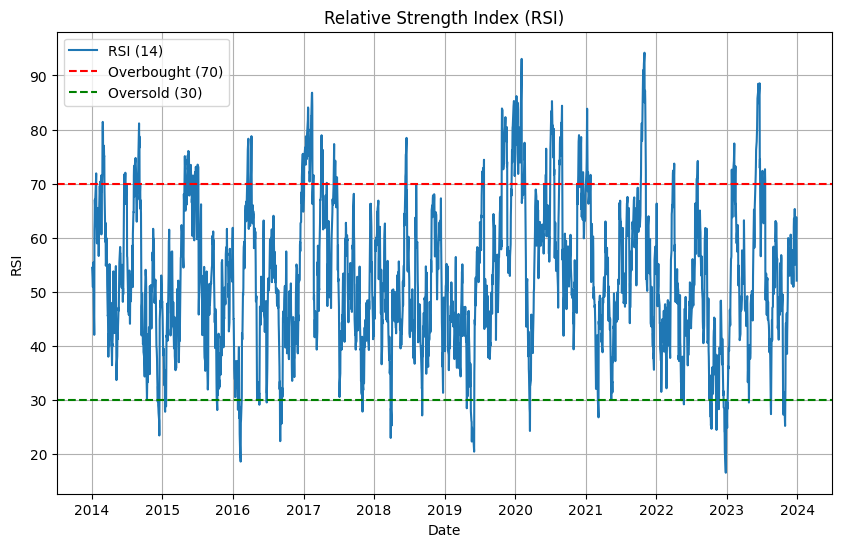

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['rsi_14'], label='RSI (14)')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

### How does the Commodity Channel Index (CCI) reflect on the stock's price movement, and are there any divergences from typical patterns?

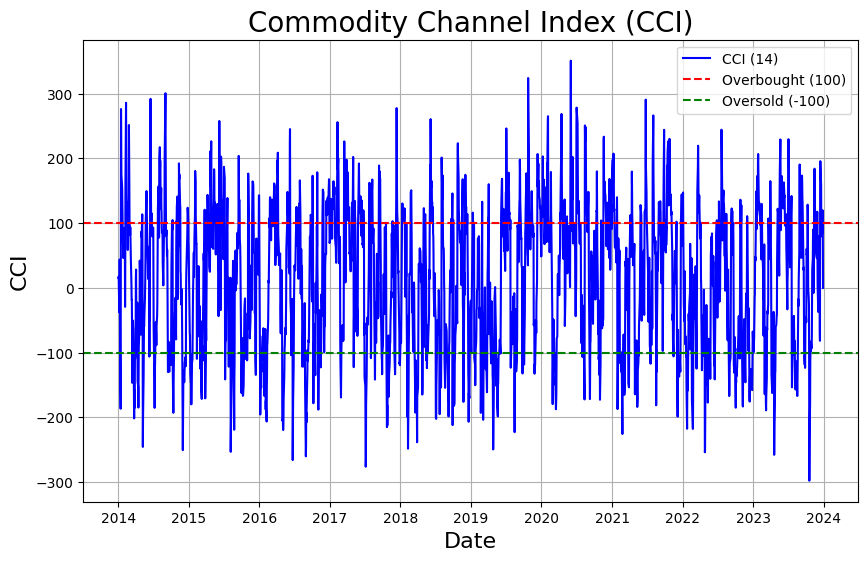

In [99]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['cci_14'], label='CCI (14)', color='blue')

plt.axhline(y=100, color='red', linestyle='--', label='Overbought (100)')
plt.axhline(y=-100, color='green', linestyle='--', label='Oversold (-100)')

plt.title('Commodity Channel Index (CCI)', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('CCI', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

### What is the moving average convergence divergence (MACD) showing about potential buy or sell signals, and how reliable are these signals given historical data?

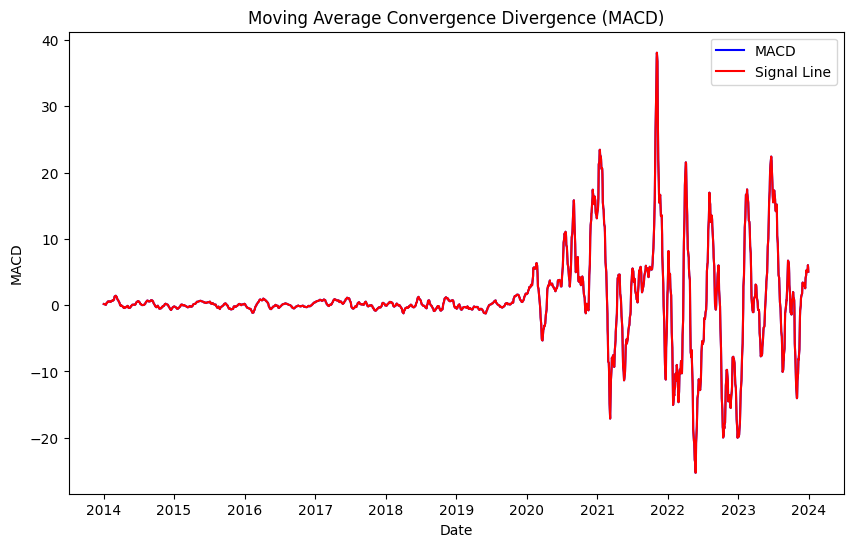

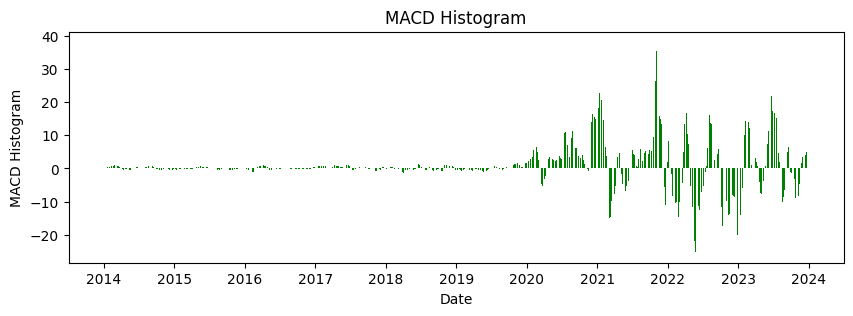

In [100]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['macd'], label='MACD', color='blue')
plt.plot(df['date'], df['macd'], label='Signal Line', color='red')
plt.title('Moving Average Convergence Divergence (MACD)')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()

plt.figure(figsize=(10, 3))
plt.bar(df['date'], df['macd'], color='green')
plt.title('MACD Histogram')
plt.xlabel('Date')
plt.ylabel('MACD Histogram')

plt.show()

### Are there any notable patterns or anomalies in the Bollinger Bands that could indicate potential breakout or reversal opportunities?

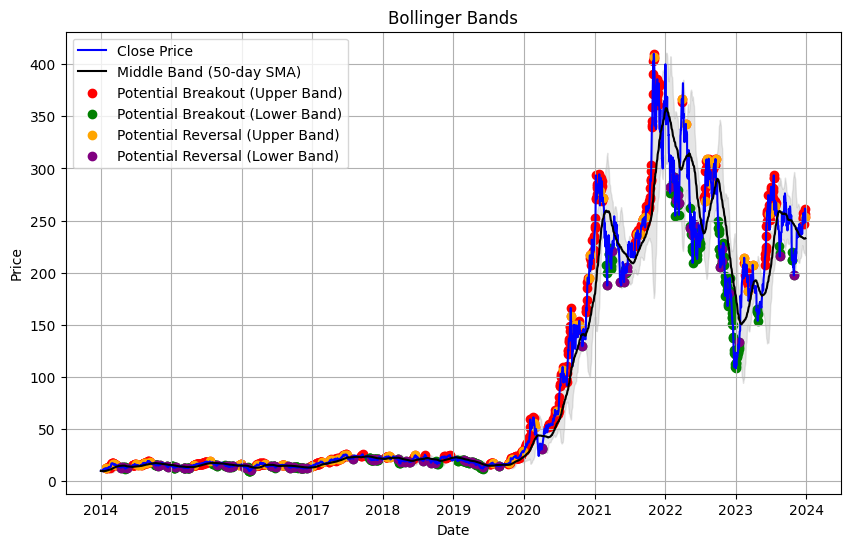

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['close'], label='Close Price', color='blue')
plt.plot(df['date'], df['sma_50'], label='Middle Band (50-day SMA)', color='black')

df['bollinger_upper'] = df['sma_50'] + 2 * df['close'].rolling(window=20).std()
df['bollinger_lower'] = df['sma_50'] - 2 * df['close'].rolling(window=20).std()

plt.fill_between(df['date'], df['bollinger_upper'], df['bollinger_lower'], alpha=0.2, color='gray')

plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.scatter(df['date'][df['close'] > df['bollinger_upper']], df['close'][df['close'] > df['bollinger_upper']], color='red', label='Potential Breakout (Upper Band)')
plt.scatter(df['date'][df['close'] < df['bollinger_lower']], df['close'][df['close'] < df['bollinger_lower']], color='green', label='Potential Breakout (Lower Band)')
plt.scatter(df['date'][(df['close'] > df['bollinger_upper']) & (df['close'].shift(-1) < df['bollinger_upper'])], df['close'][(df['close'] > df['bollinger_upper']) & (df['close'].shift(-1) < df['bollinger_upper'])], color='orange', label='Potential Reversal (Upper Band)')
plt.scatter(df['date'][(df['close'] < df['bollinger_lower']) & (df['close'].shift(-1) > df['bollinger_lower'])], df['close'][(df['close'] < df['bollinger_lower']) & (df['close'].shift(-1) > df['bollinger_lower'])], color='purple', label='Potential Reversal (Lower Band)')

plt.legend()
plt.show()

### What is the average true range (ATR) indicating about the stock's volatility, and how does it compare to historical levels?

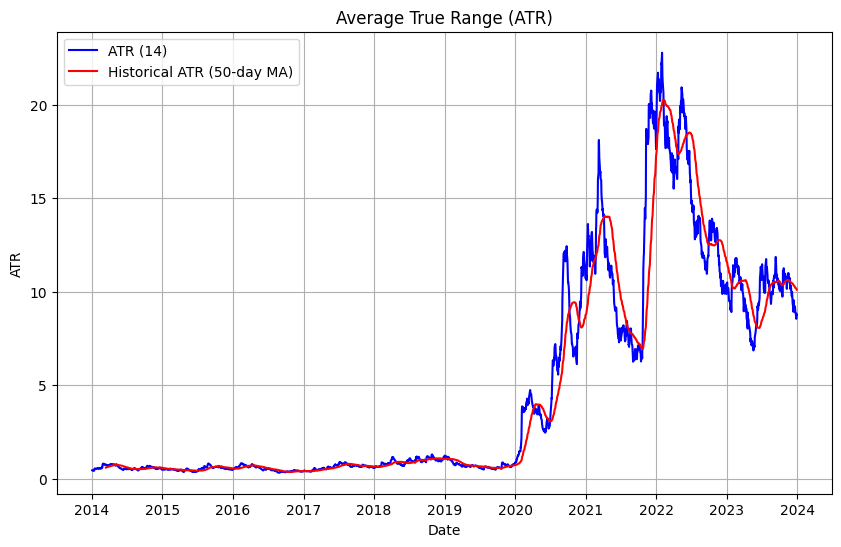

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['atr_14'], label='ATR (14)', color='blue')

historical_atr = df['atr_14'].rolling(window=50).mean()
plt.plot(df['date'], historical_atr, label='Historical ATR (50-day MA)', color='red')

plt.title('Average True Range (ATR)')
plt.xlabel('Date')
plt.ylabel('ATR')
plt.legend()
plt.grid(True)
plt.show()

### How do the short-term (7-day) and long-term (14-day) ATR values compare, and what implications does this have for risk management strategies?

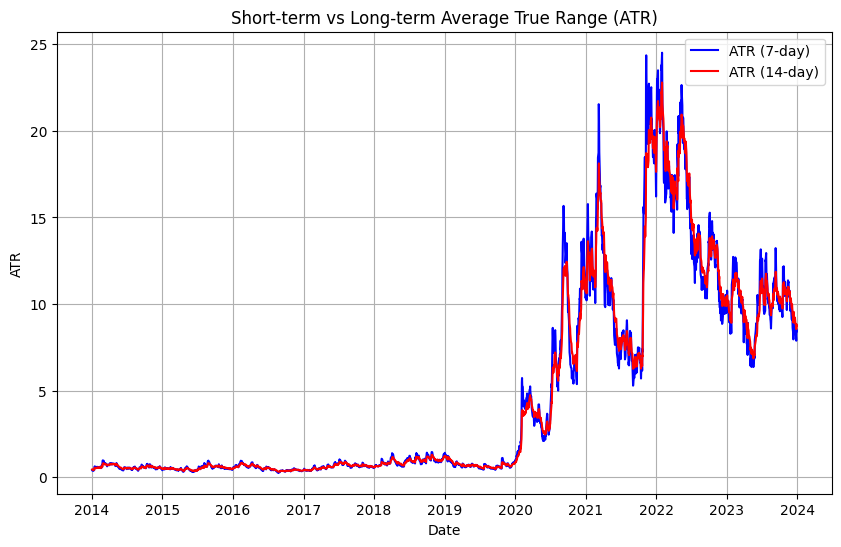

In [103]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['atr_7'], label='ATR (7-day)', color='blue')
plt.plot(df['date'], df['atr_14'], label='ATR (14-day)', color='red')

plt.title('Short-term vs Long-term Average True Range (ATR)')
plt.xlabel('Date')
plt.ylabel('ATR')
plt.legend()
plt.grid(True)
plt.show()

### How closely does the actual closing price align with the predicted next-day closing price based on historical data and technical indicators?

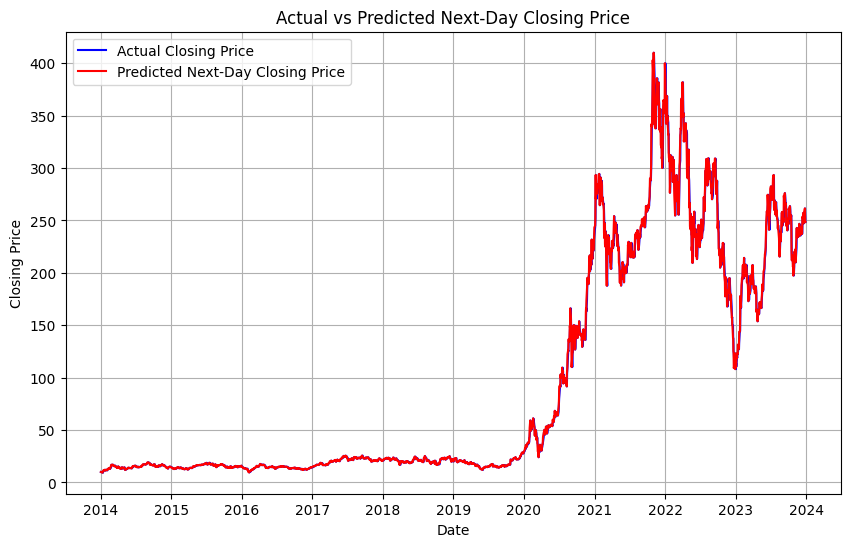

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['close'], label='Actual Closing Price', color='blue')

plt.plot(df['date'], df['next_day_close'], label='Predicted Next-Day Closing Price', color='red')

plt.title('Actual vs Predicted Next-Day Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

### How do the exponential moving averages (EMA) compare to the simple moving averages (SMA) in terms of signaling potential trend changes or price reversals?

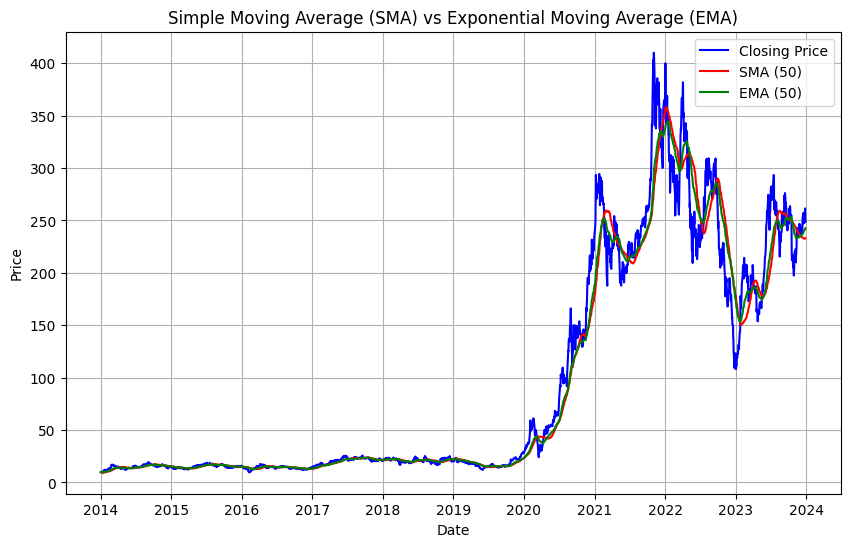

In [105]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['close'], label='Closing Price', color='blue')

plt.plot(df['date'], df['sma_50'], label='SMA (50)', color='red')
plt.plot(df['date'], df['ema_50'], label='EMA (50)', color='green')

plt.title('Simple Moving Average (SMA) vs Exponential Moving Average (EMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### Are there any seasonal or cyclical patterns in the data that could impact trading strategies or investor sentiment?

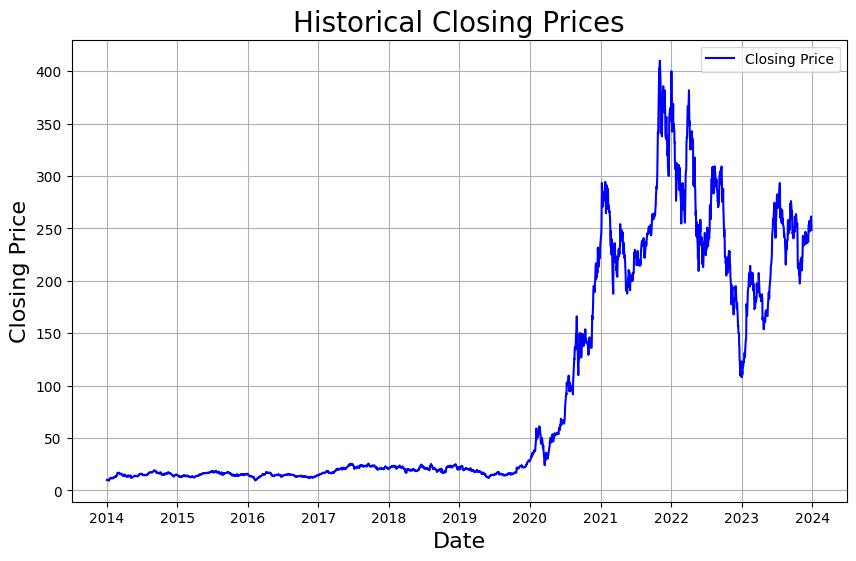

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['close'], label='Closing Price', color='blue')

plt.title('Historical Closing Prices', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Closing Price', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

### How does the current stock price compare to its historical performance, and what factors might be influencing any deviations from typical behavior?

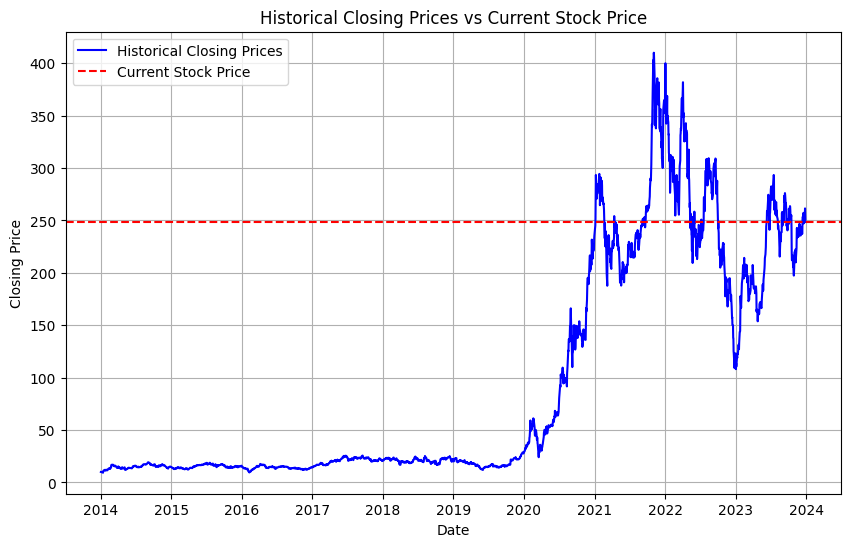

In [107]:
current_price = df['close'].iloc[-1]

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['close'], label='Historical Closing Prices', color='blue')

plt.axhline(y=current_price, linestyle='--', color='red', label='Current Stock Price')

plt.title('Historical Closing Prices vs Current Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

### How do key technical indicators (such as RSI, MACD, CCI) align with fundamental analysis of the company's performance and market conditions?

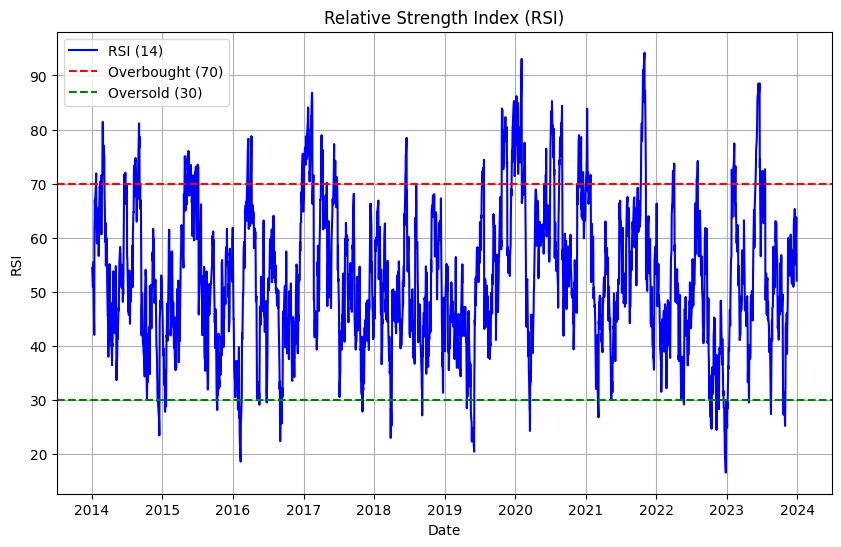

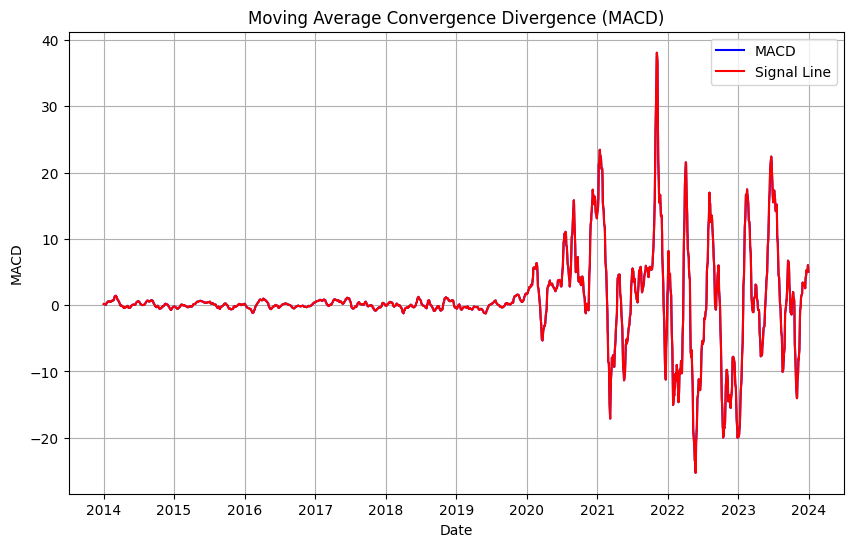

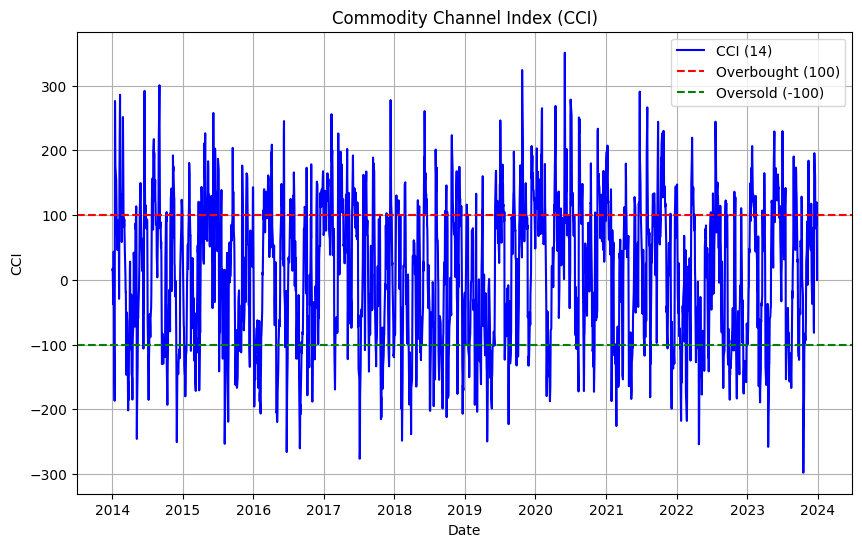

In [108]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['rsi_14'], label='RSI (14)', color='blue')
plt.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['macd'], label='MACD', color='blue')
plt.plot(df['date'], df['macd'], label='Signal Line', color='red')
plt.title('Moving Average Convergence Divergence (MACD)')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['cci_14'], label='CCI (14)', color='blue')
plt.axhline(y=100, color='red', linestyle='--', label='Overbought (100)')
plt.axhline(y=-100, color='green', linestyle='--', label='Oversold (-100)')
plt.title('Commodity Channel Index (CCI)')
plt.xlabel('Date')
plt.ylabel('CCI')
plt.legend()
plt.grid(True)
plt.show()

### What is the overall risk-reward profile of the stock based on historical price movements and volatility measures?

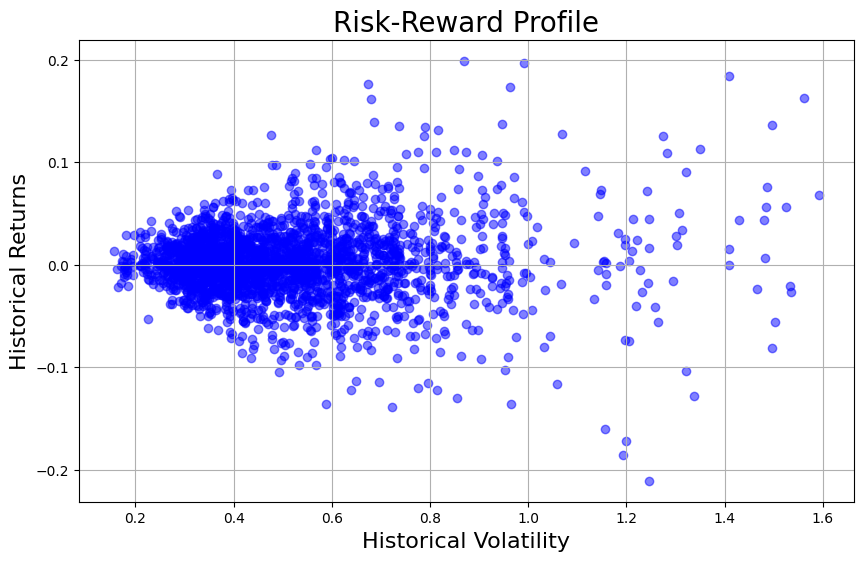

In [109]:
df['returns'] = df['close'].pct_change()

window = 20
df['volatility'] = df['returns'].rolling(window=window).std() * (252 ** 0.5)
plt.figure(figsize=(10, 6))
plt.scatter(df['volatility'], df['returns'], color='blue', alpha=0.5)
plt.title('Risk-Reward Profile', fontsize=20)
plt.xlabel('Historical Volatility', fontsize=16)
plt.ylabel('Historical Returns', fontsize=16)
plt.grid(True)
plt.show()

### How do the various technical indicators and statistical measures interact to provide a comprehensive view of the stock's behavior and potential future movements?

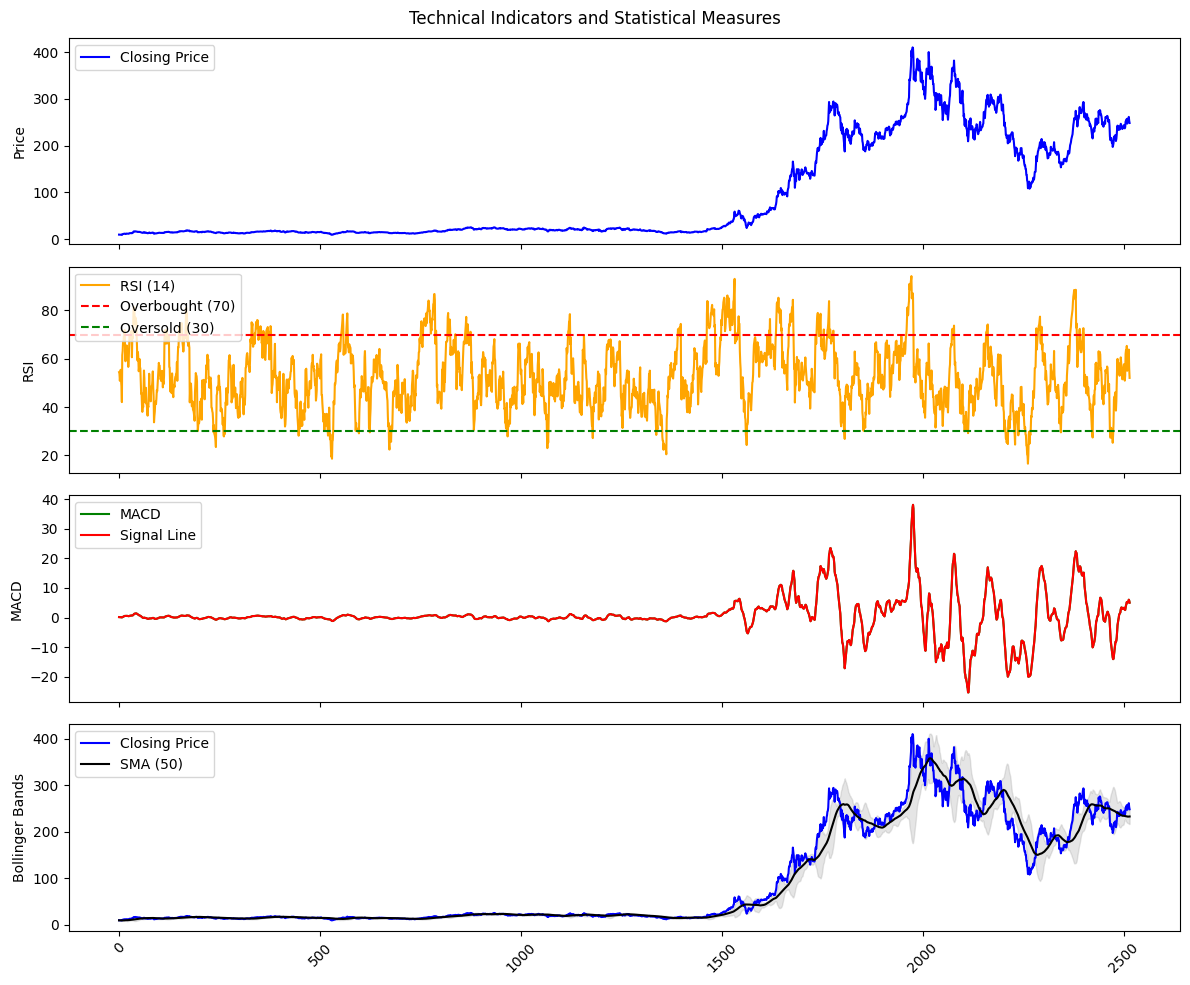

In [110]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)

axes[0].plot(df.index, df['close'], label='Closing Price', color='blue')
axes[0].set_ylabel('Price')
axes[0].legend(loc='upper left')

axes[1].plot(df.index, df['rsi_14'], label='RSI (14)', color='orange')
axes[1].axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
axes[1].axhline(y=30, color='green', linestyle='--', label='Oversold (30)')
axes[1].set_ylabel('RSI')
axes[1].legend(loc='upper left')

axes[2].plot(df.index, df['macd'], label='MACD', color='green')
axes[2].plot(df.index, df['macd'], label='Signal Line', color='red')
axes[2].set_ylabel('MACD')
axes[2].legend(loc='upper left')

axes[3].plot(df.index, df['close'], label='Closing Price', color='blue')
axes[3].plot(df.index, df['sma_50'], label='SMA (50)', color='black')
axes[3].fill_between(df.index, df['bollinger_upper'], df['bollinger_lower'], alpha=0.2, color='gray')
axes[3].set_ylabel('Bollinger Bands')
axes[3].legend(loc='upper left')

plt.xticks(rotation=45)

plt.suptitle('Technical Indicators and Statistical Measures')

plt.tight_layout()
plt.show()